# Tuango - RFM Analysis for Mobile App Push Messaging

Prepare "Tuango: RFM Analysis for Mobile App Push Messaging" for class discussion and as an individual assignment and submit the assignment through GitLab. Detailed instructions are available in the tuango.pdf the document file in the assignment repo that will be forked to your GitLab projects page:

https://rsm-gitlab.ucsd.edu/dashboard/projects

The assignment is also available on Canvas. Please generate an HTML document with your answers to all the questions listed in the tuango.pdf file. When you have finished editing the Jupyter notebook and have generated the HTML report, make sure to save, commit, and push it to GitLab. Of course you can commit and push code as often as you like, but only before the due date. View the video linked below to refresh your memory on how to clone and push git repos with python code.

[Using Git with Python Code](https://youtu.be/6mWc-FhQW5g)

Add text motivating your work in Markdown format. Markdown is a simple formatting syntax for authoring HTML. For more details on using markdown go to http://commonmark.org/help/ for a 10-minute interactive Markdown tutorial

We will collect your assignment from GitLab after the due date. Note that your python code must be fully "reproducible". That is, your Jupyter notebook must run without errors on my (or the TAs) computer and on the MSBA server. There is nothing that you need to submit to Canvas.

This is an individual assignment. As a reminder, it is an honor code violation to share any assignment or exam solution from this class with another student in a current class or a future class generation. It is also an honor code violation to obtain assignments or exams from a student in another current class or a past class generation for use as an aid in solving problems to be turned in and  graded. Please respect the honor code as it helps to maintain parity in the classroom.

Note: GitLab will automatically tests if your work is fully reproducible each time to "push" changes (see .gitlab-ci.yml for the configuration). If you get an email from GitLab stating that there was an error, it suggests a problem in your code. Note that the setup for this assignment will *not* test if your analysis is correct. Only if the code is valid and runs without issue in the docker container.

## Setup

Please complete this python notebook by answering the questions 1-14 in `tuango.pdf`.  The code blocks below will load a few python modules you will need and also the data you will need for this first notebook. 

Hint: Make sure to use the `xtile` function from the pyrsm package to create all RFM "bins"

In [2]:
import numpy as np
import pandas as pd
import pyrsm as rsm
import seaborn as sns
import matplotlib.pyplot as plt

# you can import additional python packages but only use packages that
# are already part of the docker container

In [152]:
## Use this dataset and notebook to answer questions 1-13
tuango = pd.read_pickle("data/tuango_pre.pkl")

## Part I:  Preliminary and Quintile Analysis (Q1 to Q6, 3 points each)

### 1. What percentage of customers responded (i.e., bought anything) after the push message?

In [153]:
# insert calculation code here
# the result should be expressed as a percentage as a string with 2 decimal 
# places and assigned to q1 (e.g., q1 = '5.43%')

q1 = len(tuango[tuango['buyer'] == 'yes'])/27878
print ("{:.2%}".format(q1))

2.98%



### 2. What was the average amount spent on the Karaoke deal by customers that bought one (or more)? Use the `ordersize` variable for your calculation

In [154]:
# insert calculation code here to create a pd.pivot_table that shows
# (1) counts the number of yes and no, (2) the mean ordersize, and 
# (3) the standard deviation in ordersize for yes and no responses
q2 = pd.pivot_table(tuango, index=['buyer'],values=['ordersize'], aggfunc=[np.mean,np.std])

# the below should show your result
q2.loc["yes", "mean"]

q2

,mean,std
,ordersize,ordersize
buyer,,
yes,202.128761,40.48003
no,0.000000,0.00000


### 3.	Create independent quintile variables for recency, frequency and monetary

In [155]:
# insert calculation code to add columns `rec_iq`, `freq_iq`, and `mon_iq`
# to the `tuango` DataFrame
# Hint: You can also use the 'assign' method for DataFrames to add multiple
# varialbes in one step
tuango["rec_iq"] = tuango["rfm_iq_pre"].apply(lambda x: x[0])
tuango["freq_iq"] = tuango["rfm_iq_pre"].apply(lambda x: x[1])
tuango["mon_iq"] = tuango["rfm_iq_pre"].apply(lambda x: x[2])
tuango

#tuango["rec_iq"] = 
#tuango["freq_iq"] = 
#tuango["mon_iq"] =

,userid,recency,frequency,monetary,rfm_iq_pre,buyer,ordersize,platform,category,mobile_os,training,rec_iq,freq_iq,mon_iq
0,U12617430,309,7,39.80,514,no,0.0,App,3,android,1,5,1,4
1,U63302737,297,8,39.80,514,no,0.0,Browser,3,android,1,5,1,4
2,U77095928,295,1,72.90,553,no,0.0,Browser,3,android,1,5,5,3
3,U43509181,277,1,40.00,554,no,0.0,Browser,3,android,1,5,5,4
4,U23195941,259,1,21.00,555,no,0.0,App,3,android,1,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278775,U14081166,329,12,8.16,515,NaN,NaN,App,9,android,0,5,1,5
278776,U44222234,14,4,314.67,231,NaN,NaN,App,9,android,0,2,3,1
278777,U27441294,58,7,22.57,415,NaN,NaN,App,9,android,0,4,1,5
278778,U50898226,20,5,33.00,324,NaN,NaN,App,9,android,0,3,2,4


### 4.	Create bar charts showing the response rate (i.e., the proportion of customers who bought something) for this deal per (independent) recency, frequency, and monetary quintile (i.e., 3 plots)

> Note: Ensure the 1st quantile contains the best customers for each variable you create

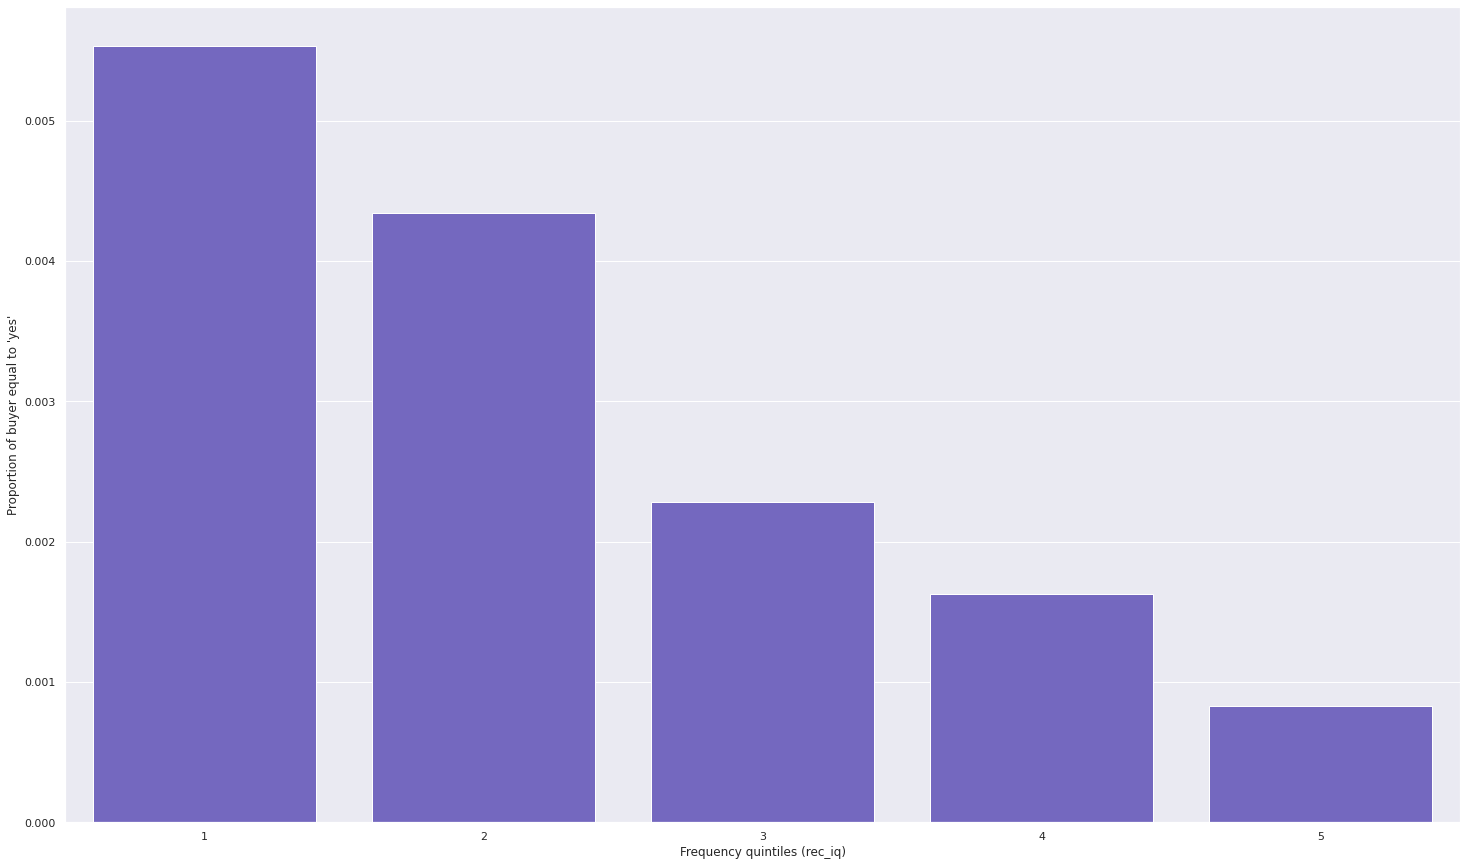

In [156]:
# insert code here
#rec
fig = rsm.prop_plot(tuango, "rec_iq", "buyer", "yes")
fig = fig.set(xlabel="Frequency quintiles (rec_iq)")

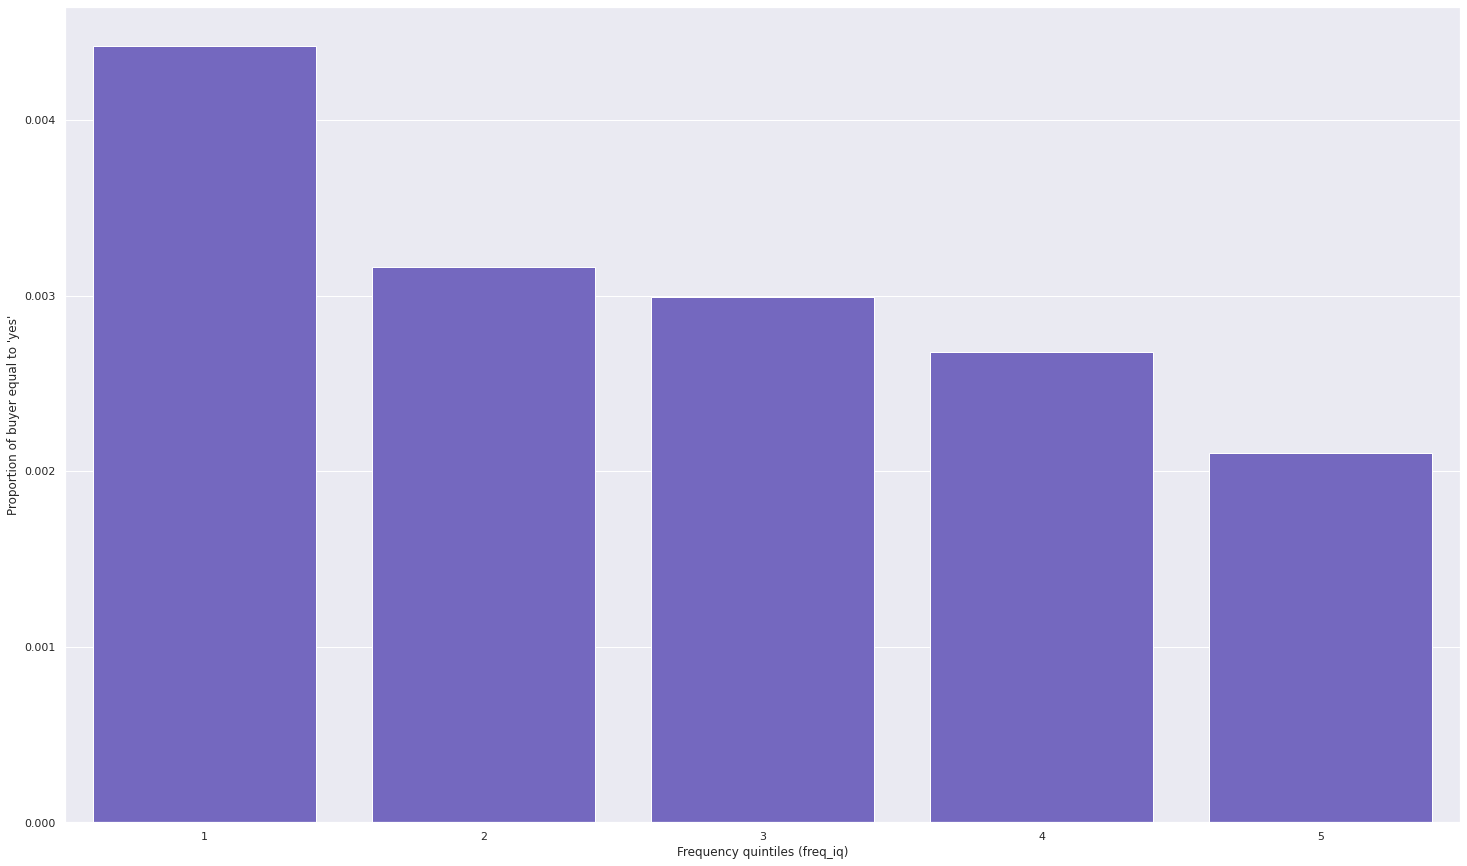

In [157]:
#freq
fig = rsm.prop_plot(tuango, "freq_iq", "buyer", "yes")
fig = fig.set(xlabel="Frequency quintiles (freq_iq)")

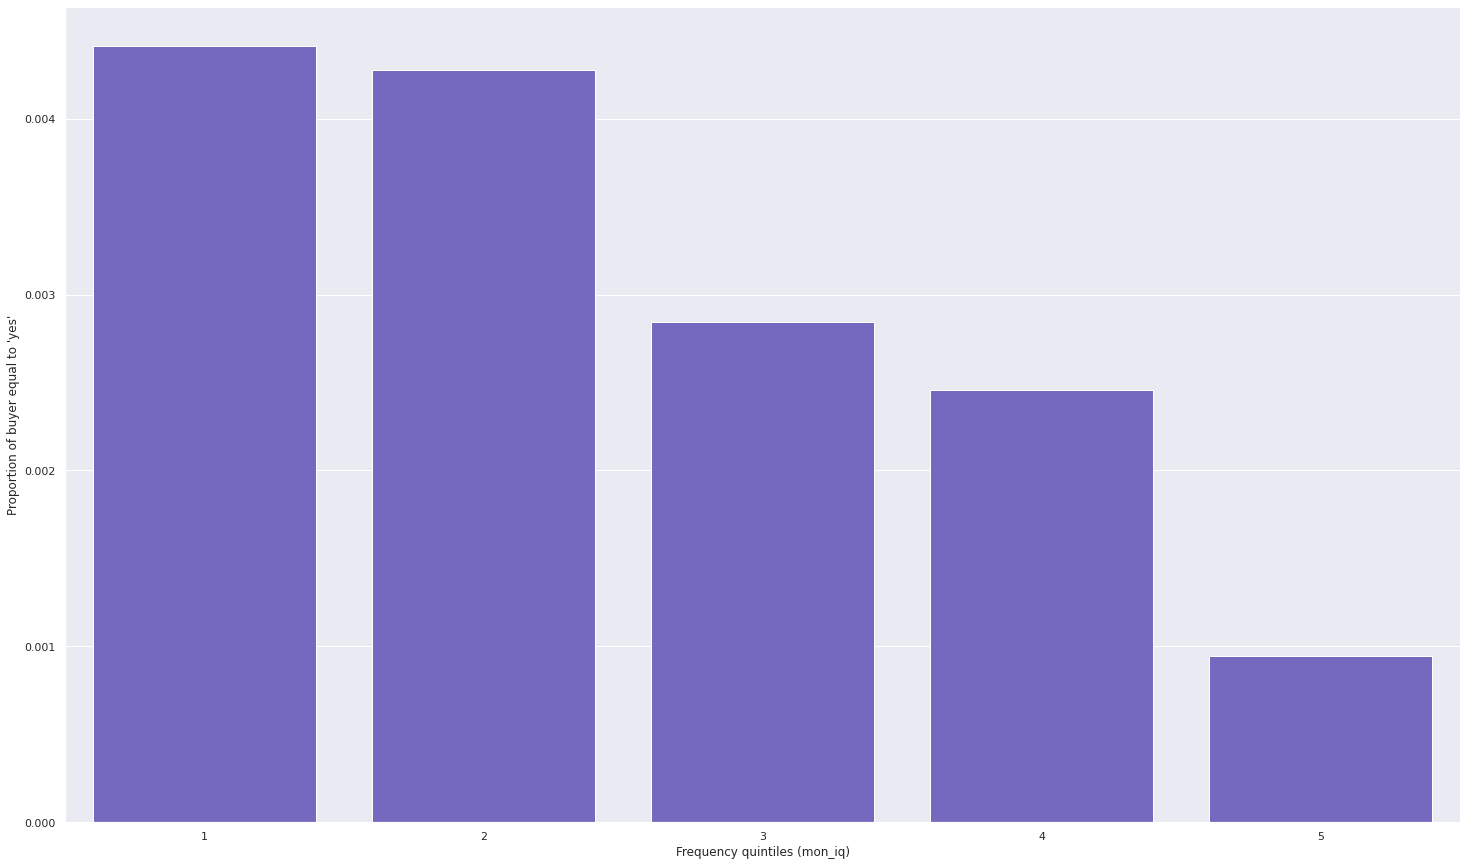

In [158]:
#monetary
fig = rsm.prop_plot(tuango, "mon_iq", "buyer", "yes")
fig = fig.set(xlabel="Frequency quintiles (mon_iq)")

### 5.	Create bar charts showing the average amount spent (in RMB) (i.e., ordersize) per independent recency, frequency, and monetary quintile using only those customers who placed an order after the push message (i.e., 3 plots)



<AxesSubplot:xlabel='rec_iq'>

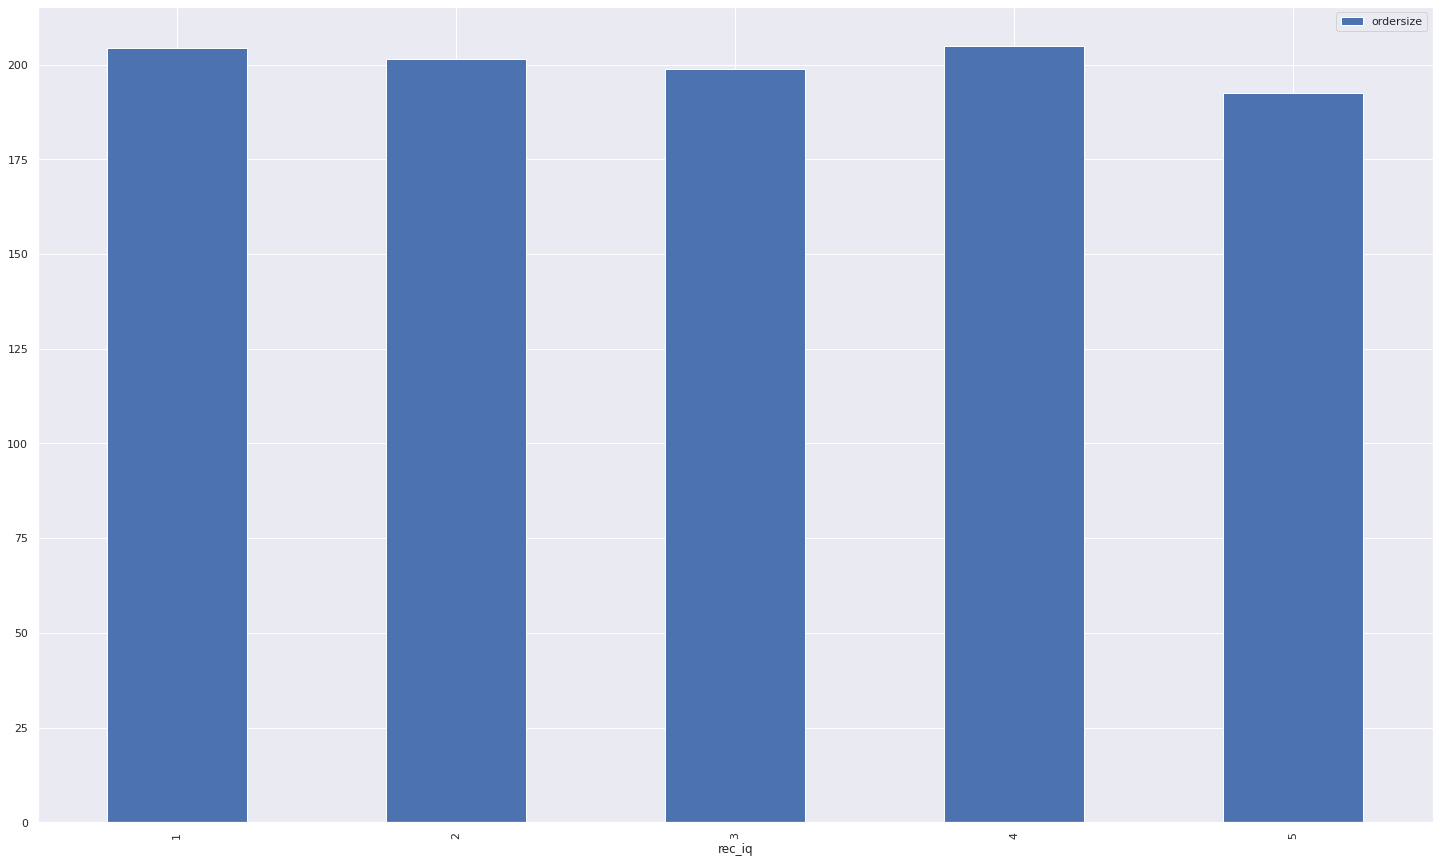

In [159]:
# insert code here
#rec
tuango[tuango['buyer'] == 'yes'].groupby('rec_iq').mean().reset_index().plot.bar(x = 'rec_iq', y = 'ordersize')

<AxesSubplot:xlabel='freq_iq'>

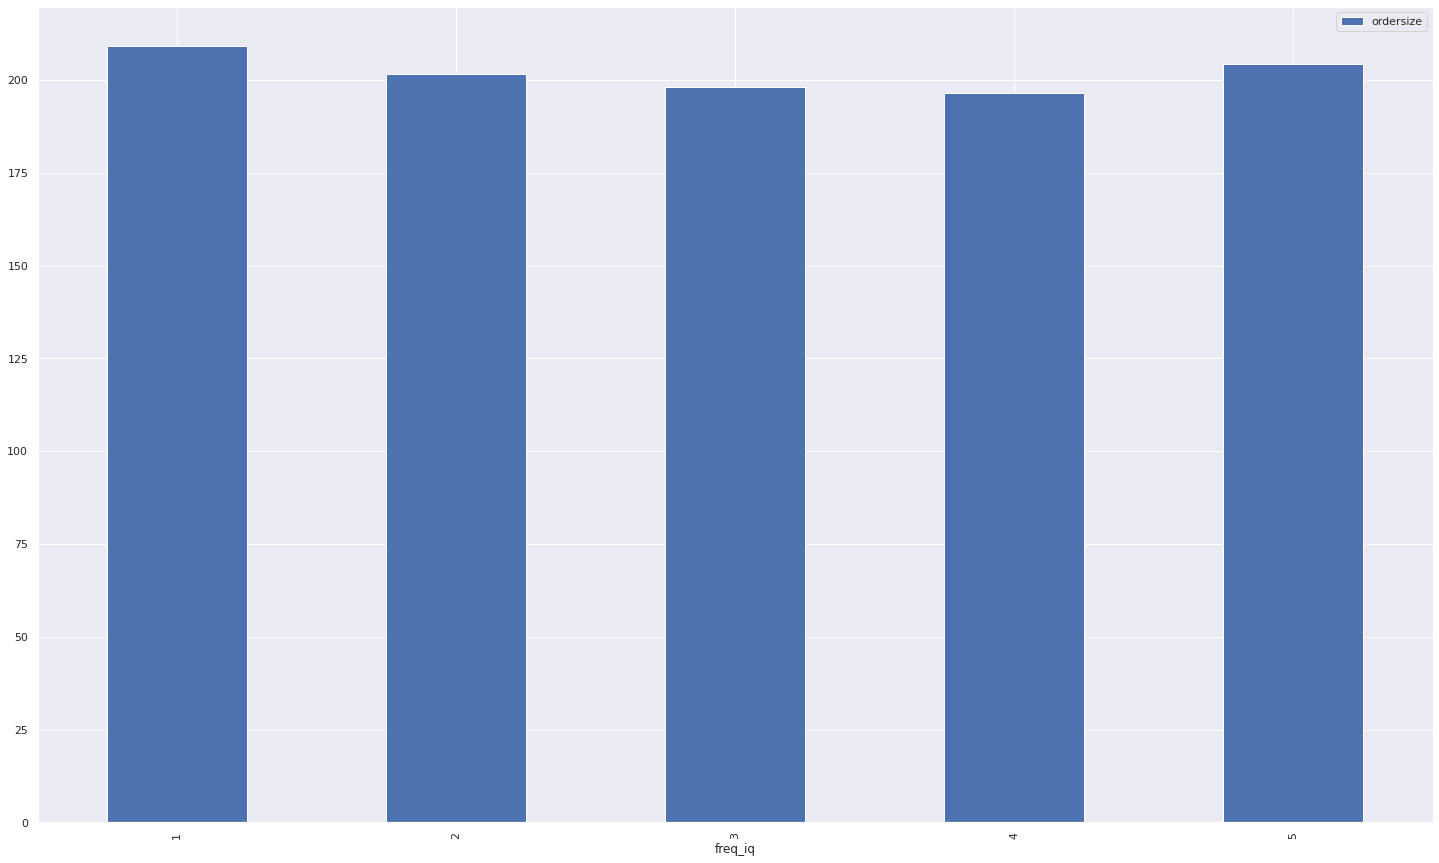

In [160]:
#freq
tuango[tuango['buyer'] == 'yes'].groupby('freq_iq').mean().reset_index().plot.bar(x = 'freq_iq', y = 'ordersize')

<AxesSubplot:xlabel='mon_iq'>

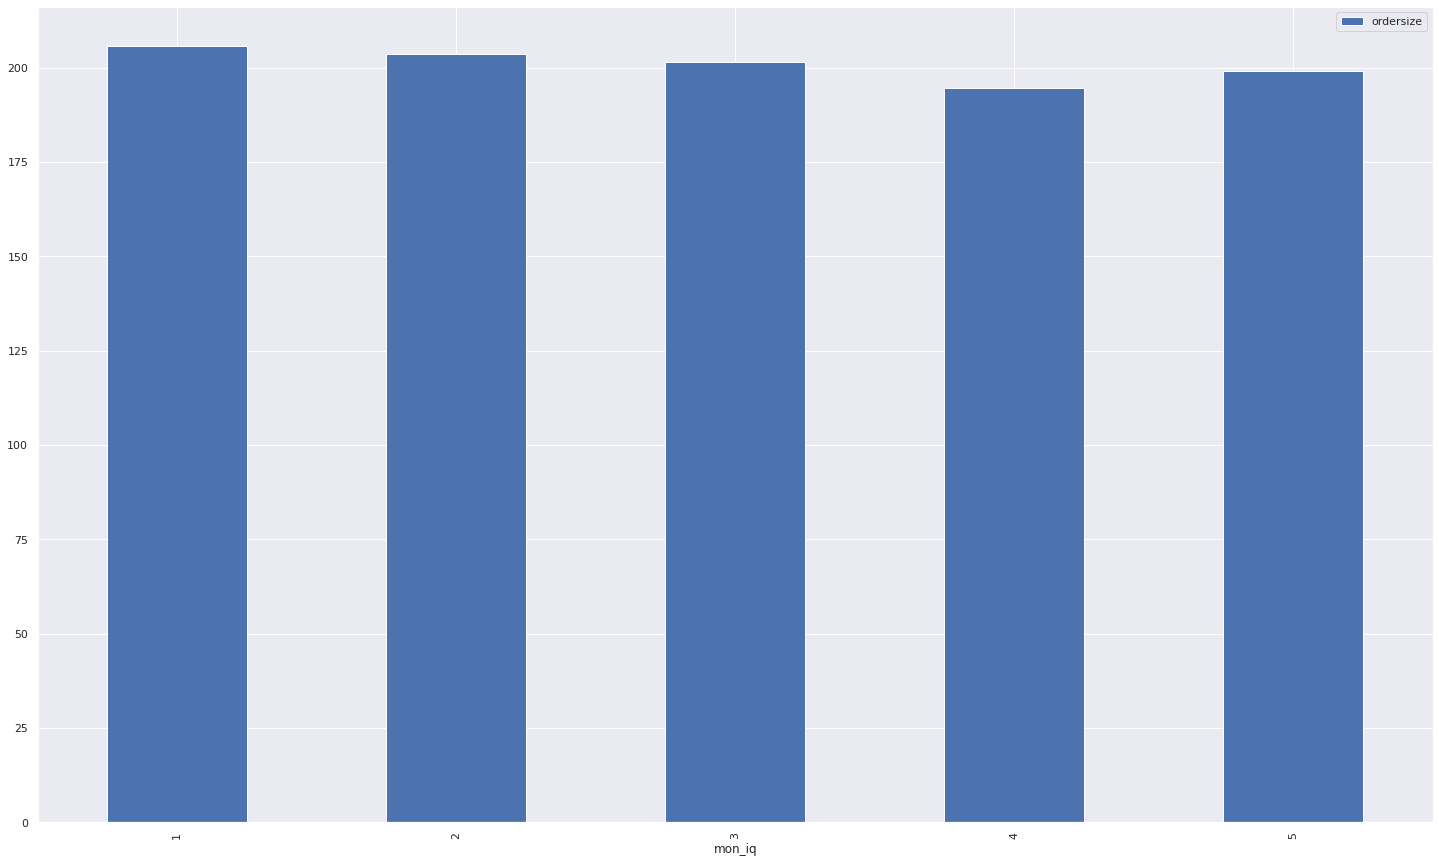

In [161]:
#monetary
tuango[tuango['buyer'] == 'yes'].groupby('mon_iq').mean().reset_index().plot.bar(x = 'mon_iq', y = 'ordersize')

### 6.	What do the above bar charts reveal about the likelihood of response and the size of the order across the different recency, frequency, and monetary quintiles?

... enter your response here ...

## Part II: Profitability Analysis (Q7, 2 points; Q8 to Q13, 6 points each, Q14, 10 points)


### 7. What is the breakeven response rate?

In [162]:
# state your assumptions relevant to calculate the breakeven response rate
# breakeven should be of type `float`

cost = 2.5 # float, length 1
margin = float(q2.loc["yes", "mean"] * 0.5 ) # float, length 1
breakeven = float(cost/ margin)  # float, length 1
q7 = float(breakeven * 100 )
#breakeven
q7

2.473670736862159

### 8. What is the projected profit in RMB and the return on marketing expenditures if you offer the deal to all 250,902 remaining customers?

In [163]:
# insert calculation code here
# all variables should be numeric (integer or float) and of length 1
# _nt stands for 'no targeting'

nr_sms_nt = 250902 # total number of SMSs that would be sent out
sms_cost_nt = nr_sms_nt * cost# total cost in RMB (no rounding)
nr_responses_nt = nr_sms_nt * q1 # total number of positive responses
response_rate_nt = q1 # expressed as a proportion (no rounding)
revenue_nt = nr_responses_nt * margin # total revenue in RMB (no rounding)
profit_nt = revenue_nt - sms_cost_nt # total profit in RMB (no rounding)
ROME_nt = profit_nt/(sms_cost_nt) # Return on Marketing Expenditures expressed as a proportion (no rounding)
print ("{:.2%}".format(ROME_nt))

20.50%


In [164]:
tuango

,userid,recency,frequency,monetary,rfm_iq_pre,buyer,ordersize,platform,category,mobile_os,training,rec_iq,freq_iq,mon_iq
0,U12617430,309,7,39.80,514,no,0.0,App,3,android,1,5,1,4
1,U63302737,297,8,39.80,514,no,0.0,Browser,3,android,1,5,1,4
2,U77095928,295,1,72.90,553,no,0.0,Browser,3,android,1,5,5,3
3,U43509181,277,1,40.00,554,no,0.0,Browser,3,android,1,5,5,4
4,U23195941,259,1,21.00,555,no,0.0,App,3,android,1,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278775,U14081166,329,12,8.16,515,NaN,NaN,App,9,android,0,5,1,5
278776,U44222234,14,4,314.67,231,NaN,NaN,App,9,android,0,2,3,1
278777,U27441294,58,7,22.57,415,NaN,NaN,App,9,android,0,4,1,5
278778,U50898226,20,5,33.00,324,NaN,NaN,App,9,android,0,3,2,4


### 9. Evaluate the performance implications of offering the deal to only those customers (out of 250,902) in RFM cells with a response rate greater than the breakeven response rate

Generate your result based on both sequential and independent RFM. Determine the projected profit in RMB and the return on marketing expenditures for each approach

In [165]:
# add `rfm_iq` to the tuango dataset
tuango = tuango.assign(rec_iq=rsm.xtile(tuango.recency, 5))
tuango = tuango.assign(freq_iq=rsm.xtile(tuango.frequency, 5, rev=True))
tuango = tuango.assign(mon_iq=rsm.xtile(tuango.monetary, 5, rev=True))
tuango["rfm_iq"] = tuango["rec_iq"].astype(str) + tuango["freq_iq"].astype(str) + tuango["mon_iq"].astype(str)


In [166]:
# determine which customers to sms based on independent quintiles RFM
def mailto(x, lev = 'yes', breakeven = 0):
    return (np.sum(x == lev) / np.sum((x == "yes") | (x == "no"))) > breakeven

#breakeven = 0.02473670736862159
tuango["smsto_iq"] = tuango.groupby("rfm_iq").buyer.transform(mailto, breakeven = breakeven)

In [167]:
tuango[tuango['training'] == 0]

,userid,recency,frequency,monetary,rfm_iq_pre,buyer,ordersize,platform,category,mobile_os,training,rec_iq,freq_iq,mon_iq,rfm_iq,smsto_iq
27878,U19852740,33,1,22.50,455,NaN,NaN,App,17,android,0,4,5,5,455,False
27879,U27655800,12,2,109.00,242,NaN,NaN,App,11,android,0,2,4,2,242,True
27880,U35335304,27,7,34.82,314,NaN,NaN,App,9,android,0,3,1,4,314,True
27881,U78305281,9,1,49.90,153,NaN,NaN,App,9,android,0,1,5,3,153,True
27882,U52954892,83,1,6.80,555,NaN,NaN,App,9,android,0,5,5,5,555,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278775,U14081166,329,12,8.16,515,NaN,NaN,App,9,android,0,5,1,5,515,False
278776,U44222234,14,4,314.67,231,NaN,NaN,App,9,android,0,2,3,1,231,True
278777,U27441294,58,7,22.57,415,NaN,NaN,App,9,android,0,4,1,5,415,False
278778,U50898226,20,5,33.00,324,NaN,NaN,App,9,android,0,3,2,4,324,True


In [168]:
# insert calculation code to add columns `freq_sq`, and `mon_sq`
# to the `tuango` DataFrame
# Note that pandas `assign` method doesn't allow you to use variables created in the same call to assign

tuango = tuango.assign(freq_sq = tuango.groupby('rec_iq').frequency.transform(rsm.xtile, 5, rev = True))
tuango = tuango.assign(mon_sq = tuango.groupby(["rec_iq","freq_sq"]).monetary.transform(rsm.xtile, 5, rev = True))
#tuango["freq_sq"] =
#tuango["mon_sq"] =

In [169]:
# add `rfm_sq` to the tuango dataset
#tuango["rfm_sq"] =
tuango = tuango.assign(rfm_sq = tuango.rec_iq.astype(str) + tuango.freq_sq.astype(str) + tuango.mon_sq.astype(str))

In [170]:
# determine which customers to sms based on sequential quintiles RFM
#breakeven = 0.02473670736862159
tuango["smsto_sq"] = tuango.groupby("rfm_sq").buyer.transform(mailto, breakeven = breakeven)

In [218]:
# write your perf_calc function here (see the tuango.pdf document for suggestions)
def perf_calc(dat=tuango, smsto=None, intro="", perf="buyer", lev="yes"):
    """
    Calculate projected performance implications from using different 
    targeting strategies

    Parameters
    ----------
    dat : Pandas DataFrame
        Pass the tuango dataset as the default value
    smsto : str
        A string with the name of the 'smsto' variable to use for calculations
    intro : str
        A string that provides an introduction to the printed output
    perf: str
        A string with the name of the performance variable to use ('buyer')
    lev: str
        A string with the name of the level in the perf variable that signifies success ('yes')

    Returns
    -------
    nr_sms : Total number of SMSs that would be sent out
    sms_cost : Total revenue in RMB (no rounding)
    nr_responses : Total number of positive responses
    response_rate : Expressed as a proportion (no rounding)
    revenue : Total revenue in RMB (no rounding)
    ROME : Return on Marketing Expenditures expressed as a proportion (no rounding)
    profit : Total profit in RMB (no rounding)
    """
    if smsto == None:
        nr_sms = dat[dat["training"] == 0].training.size
        nr_responses_train = dat[(dat['training'] == 1) & (dat[perf] == lev)].training.size
        total_res = dat[(dat['training'] == 1)].training.size
        response_rate = nr_responses_train / total_res
        nr_responses = nr_sms * response_rate
        
    else:
        nr_sms = dat[(dat["training"] == 0)  & (dat[smsto] == True)].training.size
        nr_responses_train = dat[(dat["training"] == 1)  & (dat[smsto] == True) & (dat[perf] == lev)].training.size
        total_res = dat[(dat['training'] == 1) & (dat[smsto] == True)].training.size
        response_rate = nr_responses_train / total_res
        nr_responses = nr_sms * response_rate
        
        
    sms_cost = cost * nr_sms # total cost in RMB (no rounding) 
    revenue = nr_sms * response_rate * margin
    profit = revenue - sms_cost
    ROME = profit / sms_cost   
    response_rate = response_rate 
    
    # insert your code
    # here the nr_response reperesents the responses in the sample, the rest of the variables are calculated based on the testing data.
    return nr_sms, sms_cost, nr_responses, response_rate, revenue, ROME, profit

perf_calc(intro="If Tuango does not apply targeting", smsto = "smsto_iq")

(111656,
 279140.0,
 6042.263810597519,
 0.05411499436302142,
 610657.6474141123,
 1.1876393473314908,
 331517.64741411235)

In [219]:
perf_calc(intro="If Tuango does not apply targeting", smsto = "smsto_sq")

(101321,
 253302.5,
 5837.165575221239,
 0.05761061946902655,
 589929.5213624166,
 1.3289526213220026,
 336627.02136241656)

In [220]:
# re-calculate performance for the no-targeting approach - should give same results as above
# note that your perf_calc function should return values for each of the variables
# listed below
# all variables should be numeric (integer or float) and of length 1
# _nt stands for 'no targeting'
nr_sms_nt, sms_cost_nt, nr_responses_nt, response_rate_nt, revenue_nt, ROME_nt, profit_nt = perf_calc(intro="If Tuango does not apply targeting")

In [221]:
# calculate performance for independent RFM
# note that your perf_calc function should return values for each of the variables
# listed below
# all variables should be numeric (integer or float) and of length 1
# _iq stands for 'independent quintiles'

nr_sms_iq, sms_cost_iq, nr_responses_iq, response_rate_iq, revenue_iq, ROME_iq, profit_iq = perf_calc(smsto = "smsto_iq", intro="If Tuango does not apply targeting")

In [222]:
# calculate performance for sequential RFM
# note that your perf_calc function should return values for each of the variables
# listed below
# all variables should be numeric (integer or float) and of length 1
# _sq stands for 'sequential quintiles'

nr_sms_sq, sms_cost_sq, nr_responses_sq, response_rate_sq, revenue_sq, ROME_sq, profit_sq = perf_calc(smsto = "smsto_sq", intro="If Tuango does not apply targeting")

### 10.	What do you notice when you compare the `rfm_iq` and `rfm_sq` variables? Do the two approaches generally yield the same RFM index for any given customer? What do you see as the pros and cons of the two approaches (from a statistical as well as logical perspective) and why?

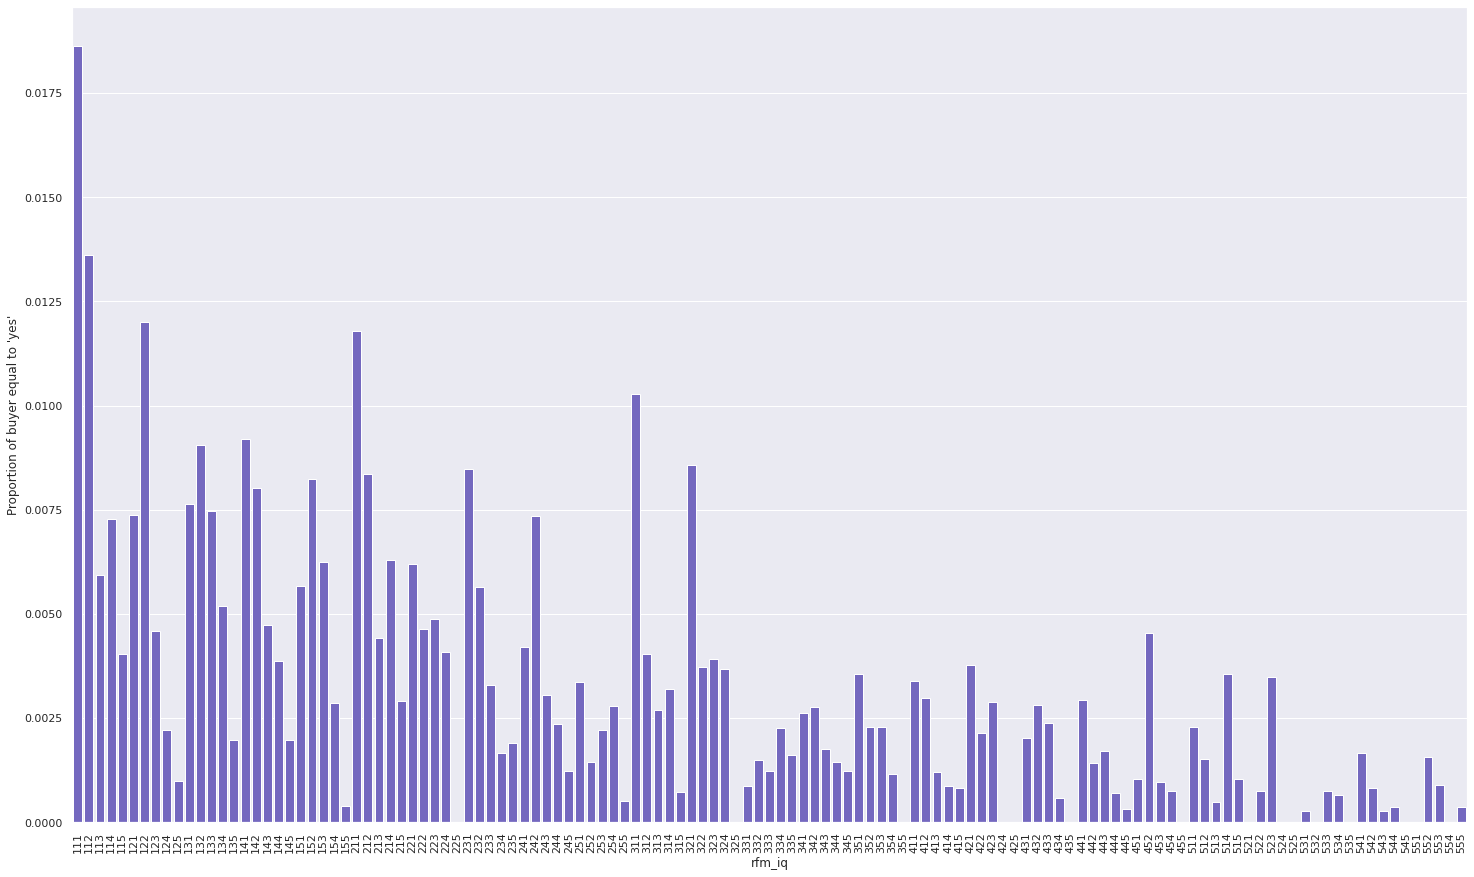

In [223]:
# insert any calculation or plotting code here
sns.set(rc = {'figure.figsize':(25,15)})
fig_iq = rsm.prop_plot(tuango, "rfm_iq", "buyer", "yes") 
fig_iq.tick_params(axis='x', rotation=90) 

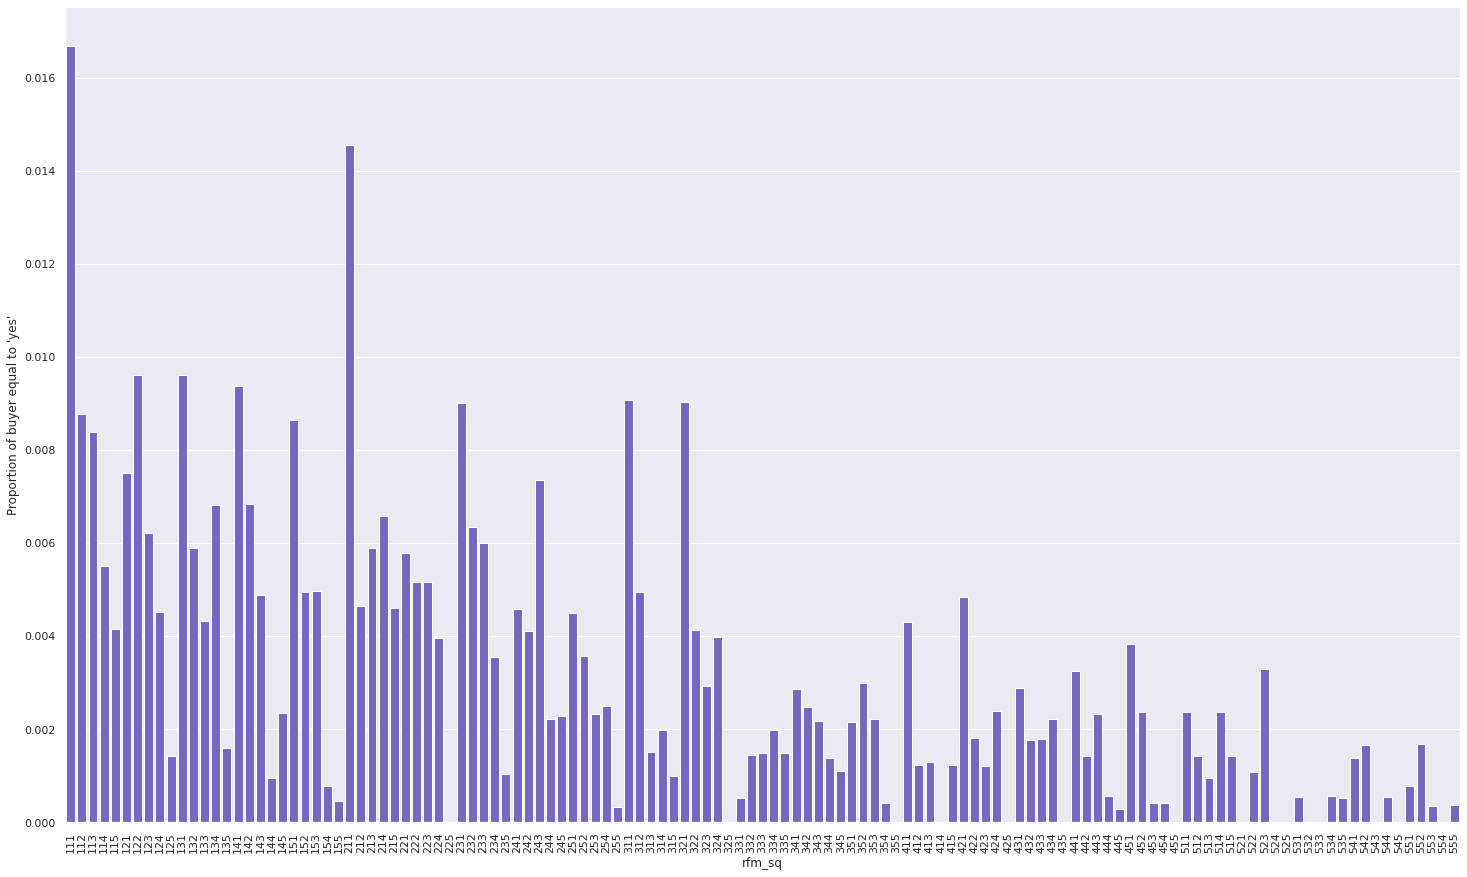

In [224]:
fig_sq = rsm.prop_plot(tuango, "rfm_sq", "buyer", "yes")
fig_sq.tick_params(axis='x', rotation=90)

In [225]:
#send sms
test_n = len(tuango[(tuango['training'] == 0)])
sms_rate_iq = nr_sms_iq / test_n
sms_rate_iq
sms_rate_sq = nr_sms_sq / test_n
sms_rate_sq

print('Among', test_n, 'testing customers, independent quintile approach suggests a', str(round(sms_rate_iq, 4)*100)+'%', "sms push rate, while the sequential quintile approach suggests a", str(round(sms_rate_sq, 4)*100)+'%', "sms push rate" )



Among 250902 testing customers, independent quintile approach suggests a 44.5% sms push rate, while the sequential quintile approach suggests a 40.38% sms push rate


In [226]:
print(response_rate_iq > response_rate_sq)
print(profit_iq > profit_sq)
print(ROME_iq > ROME_sq)
print('The suquential rate approach yields higher probability/value for either response rate, profit, or ROME')
print('The response rate of sequential rate approach is', round(response_rate_sq * 100, 4), '% which is', round(response_rate_sq  - response_rate_iq , 4), 'higher than independent rate approach.')
print('The profit of sequential rate approach is', round(profit_sq, 4), 'which is', round(profit_sq - profit_iq, 4), 'higher than independent rate approach.')
print('The ROME of sequential rate approach is', round(ROME_sq, 4), '% which is', round(ROME_sq - ROME_iq, 4), 'higher than independent rate approach.')

False
False
False
The suquential rate approach yields higher probability/value for either response rate, profit, or ROME
The response rate of sequential rate approach is 5.7611 % which is 0.0035 higher than independent rate approach.
The profit of sequential rate approach is 336627.0214 which is 5109.3739 higher than independent rate approach.
The ROME of sequential rate approach is 1.329 % which is 0.1413 higher than independent rate approach.


In [227]:
print("In conclusion, although the sequential approach suggest a less sms sending amount, but its higher response rate yields a higher profit, thus has a higher return on the market expenditure")

In conclusion, although the sequential approach suggest a less sms sending amount, but its higher response rate yields a higher profit, thus has a higher return on the market expenditure


... provide you answer here ...

### 11.	The answer to question 9 assumes a single breakeven response rate that applies across all cells. Redo your analysis for sequential RFM based on a breakeven response rate calculated for each RFM cell. What implications can you draw from the difference in predicted performance compared to question 9?

> Note: You only need to calculate smsto_pcsq for this approach. You can use your perf_calc function to determine the performance implications without any adjustments

<!-- > Note: To project the expected profits for the remaining customers not part of the sample you can use Tuango’s standard fee and the ordersize number you calculated for question 2. -->

In [228]:
# calculate the average ordersize per sq code
def response_rate(x, lev = 'yes'):
    return np.sum(x == lev) / np.sum((x == "yes") | (x == "no"))

avg_ordersize_sq = tuango[tuango['buyer'] == 'yes'].groupby(["rfm_sq"])["ordersize"].apply(np.nanmean)
tuango["avg_ordersize_sq"] = tuango.merge(avg_ordersize_sq,on = "rfm_sq", how = 'left').iloc[: , -1]


# calculate a breakeven value per sq code
tuango["breakeven_pc"] = cost / (tuango["avg_ordersize_sq"] / 2)

# calculate the smsto variable based on breakeven value per sq code
# _pcsq stands for 'per cell sequential quintiles'

tuango["smsto_pcsq"] = tuango.groupby("rfm_sq").buyer.transform(response_rate, lev = 'yes') >= tuango["breakeven_pc"]
#tuango["smsto_pcsq"] = tuango["response_rate_sq"] >= tuango["breakeven_pc"]

In [229]:
tuango

,userid,recency,frequency,monetary,rfm_iq_pre,buyer,ordersize,platform,category,mobile_os,...,freq_sq,mon_sq,rfm_sq,smsto_sq,avg_ordersize_sq,breakeven_pc,smsto_pcsq,buyer_yes,prop_lb_sq,smsto_lbsq
0,U12617430,309,7,39.80,514,no,0.0,App,3,android,...,1,4,514,False,161.000000,0.031056,False,0.0,0.006399,False
1,U63302737,297,8,39.80,514,no,0.0,Browser,3,android,...,1,4,514,False,161.000000,0.031056,False,0.0,0.006399,False
2,U77095928,295,1,72.90,553,no,0.0,Browser,3,android,...,5,3,553,False,209.000000,0.023923,False,0.0,-0.002316,False
3,U43509181,277,1,40.00,554,no,0.0,Browser,3,android,...,5,4,554,False,NaN,NaN,False,0.0,0.000000,False
4,U23195941,259,1,21.00,555,no,0.0,App,3,android,...,5,5,555,False,209.000000,0.023923,False,0.0,-0.002468,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278775,U14081166,329,12,8.16,515,NaN,NaN,App,9,android,...,1,5,515,False,182.333333,0.027422,False,NaN,0.000889,False
278776,U44222234,14,4,314.67,231,NaN,NaN,App,9,android,...,3,1,231,True,176.058824,0.028400,True,NaN,0.056123,True
278777,U27441294,58,7,22.57,415,NaN,NaN,App,9,android,...,1,4,414,False,NaN,NaN,False,NaN,0.000000,False
278778,U50898226,20,5,33.00,324,NaN,NaN,App,9,android,...,2,4,324,True,189.000000,0.026455,True,NaN,0.007863,False


In [230]:
# calculate performance for break-even-per-cell sequential RFM
# note that your perf_calc function should return values for each of the variables
# listed below
# all variables should be numeric (integer or float) and of length 1
# _pcsq stands for 'per cell sequential quintiles'

nr_sms_pcsq, sms_cost_pcsq, nr_responses_pcsq, response_rate_pcsq, revenue_pcsq, ROME_pcsq, profit_pcsq = perf_calc(
    smsto="smsto_pcsq", intro="Based on sequential RFM with breakeven per cell"
)
perf_calc(
    smsto="smsto_pcsq", intro="Based on sequential RFM with breakeven per cell"
)

(110617,
 276542.5,
 6052.729815175097,
 0.054717898832684825,
 611715.3876805932,
 1.2120122139656406,
 335172.8876805932)

### 12.	The answer to question 9 does not account for the fact that the response rate for each cell is an estimated quantity (i.e., it has a standard error). Redo your analysis for both independent RFM, adjusting for the standard error of the response rate in each cell

In [235]:
# calculate the performance for lower bound with sequential quintiles
# note that your perf_calc function should return values for each of the variables
# listed below
# all variables should be numeric (integer or float) and of length 1
# _lbsq stands for 'lower bound with sequential quintiles'
def prop_lb(x):
    return np.nanmean(x) - 1.64 * rsm.seprop(x)

tuango["buyer_yes"] = tuango["buyer"].apply(lambda x: 1 if x == "yes" else 0) 
test_df =  tuango[["rfm_sq", 'buyer_yes']]
test = test_df.groupby(["rfm_sq"]).transform(prop_lb)
tuango["smsto_lbsq"] = test > breakeven



In [236]:
nr_sms_lbsq, sms_cost_lbsq, nr_responses_lbsq, response_rate_lbsq, revenue_lbsq, ROME_lbsq, profit_lbsq = perf_calc(
    smsto="smsto_lbsq",
    intro="Based on sequential RFM adjusted for response rate prediction accuracy",
)

perf_calc(
    smsto="smsto_lbsq",
    intro="Based on sequential RFM adjusted for response rate prediction accuracy",
)

(54974,
 137435.0,
 4083.4246619970677,
 0.07427919856654178,
 412688.7828224943,
 2.0027924678756817,
 275253.7828224943)

In [237]:
# insert calculation code here - you do not need to do this 'per cell'
# _lbiq stands for 'lower bound independent quintiles'

tuango["smsto_lbiq"] = tuango.groupby(["rfm_iq"]).buyer_yes.transform(prop_lb) > breakeven

In [238]:
# calculate the performance for lower bound with independent quintiles
# note that your perf_calc function should return values for each of the variables
# listed below
# all variables should be numeric (integer or float) and of length 1
# _lbiq stands for 'lower bound with independent quintiles'

nr_sms_lbiq, sms_cost_lbiq, nr_responses_lbiq, response_rate_lbiq, revenue_lbiq, ROME_lbiq, profit_lbiq = perf_calc(
    smsto="smsto_lbiq",
    intro="Based on independent RFM adjusted for response rate prediction accuracy",
)

perf_calc(
    smsto="smsto_lbiq",
    intro="Based on independent RFM adjusted for response rate prediction accuracy",
)

(54445,
 136112.5,
 4116.178606800924,
 0.07560250907890392,
 415999.0399553215,
 2.05628829060756,
 279886.5399553215)

### 13.	Create a bar chart with profit information and a bar chart with ROME numbers for the analyses conducted in questions 9, 11, and 12

In [239]:
# the below DataFrame should collect all performance information you created above
plot_data = pd.DataFrame(
    {
        "name": [
            "No targeting",
            "Indep. RFM",
            "Seq. RFM",
            "Seq. PC RFM",
            "Indep. LB RFM",
        ],
        "Profit": [
            profit_nt,
            profit_iq,
            profit_sq,
            profit_pcsq,
            profit_lbiq,
        ],
        "ROME": [ROME_nt, ROME_iq, ROME_sq, ROME_pcsq, ROME_lbiq],
    }
)

In [240]:
plot_data

,name,Profit,ROME
0,No targeting,128605.500000,0.205029
1,Indep. RFM,331517.647414,1.187639
2,Seq. RFM,336627.021362,1.328953
3,Seq. PC RFM,335172.887681,1.212012
4,Indep. LB RFM,279886.539955,2.056288


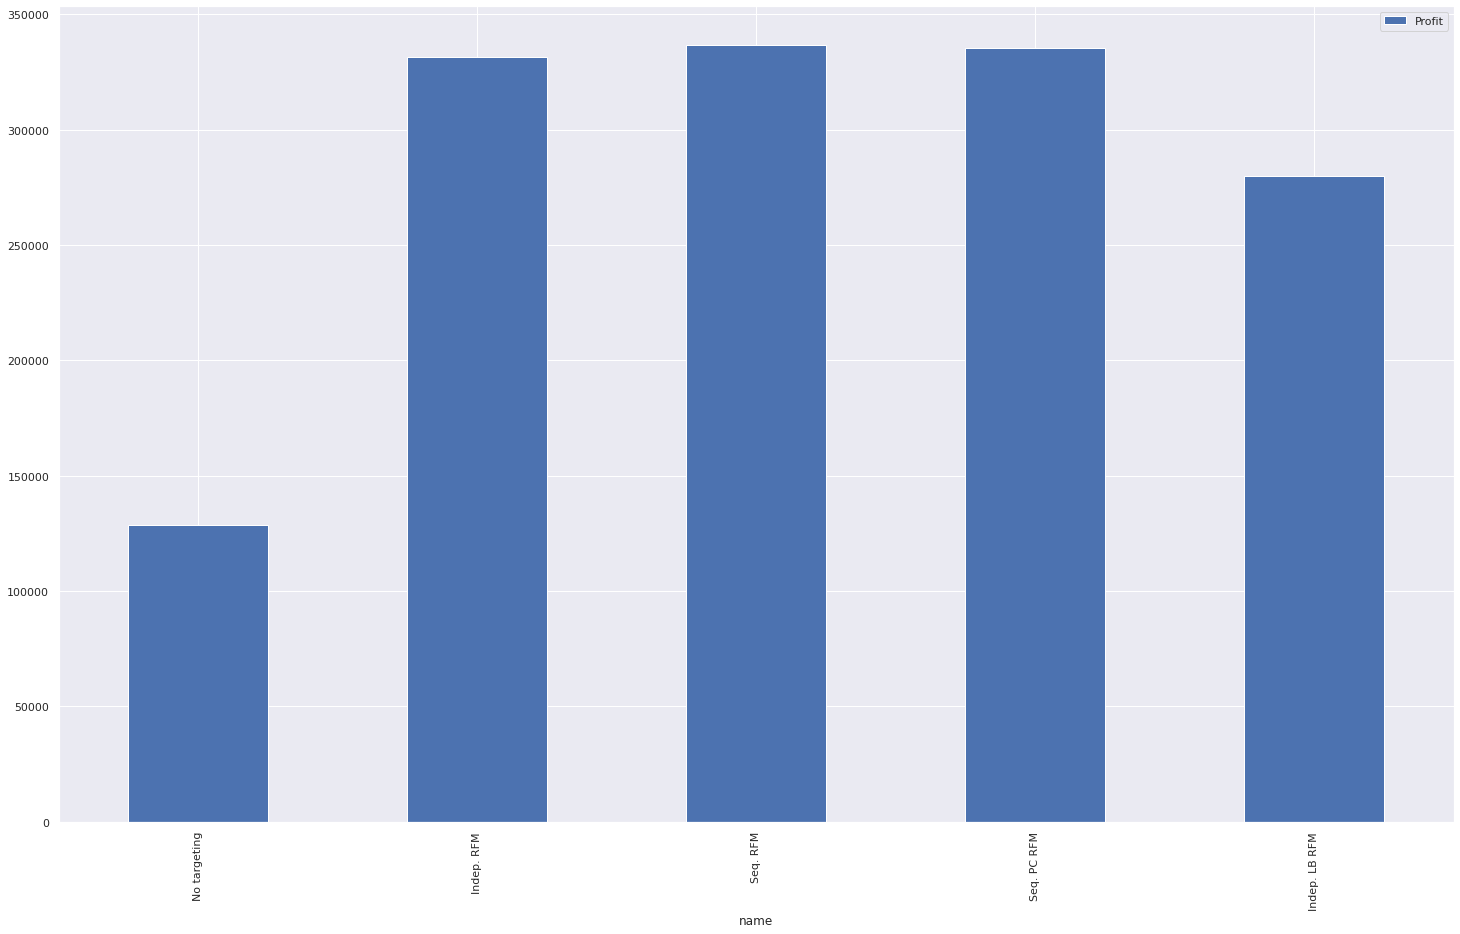

In [245]:
# insert code for the profit plot based on the 'plot_data' DataFrame
fig = plot_data.plot.bar('name', 'Profit')

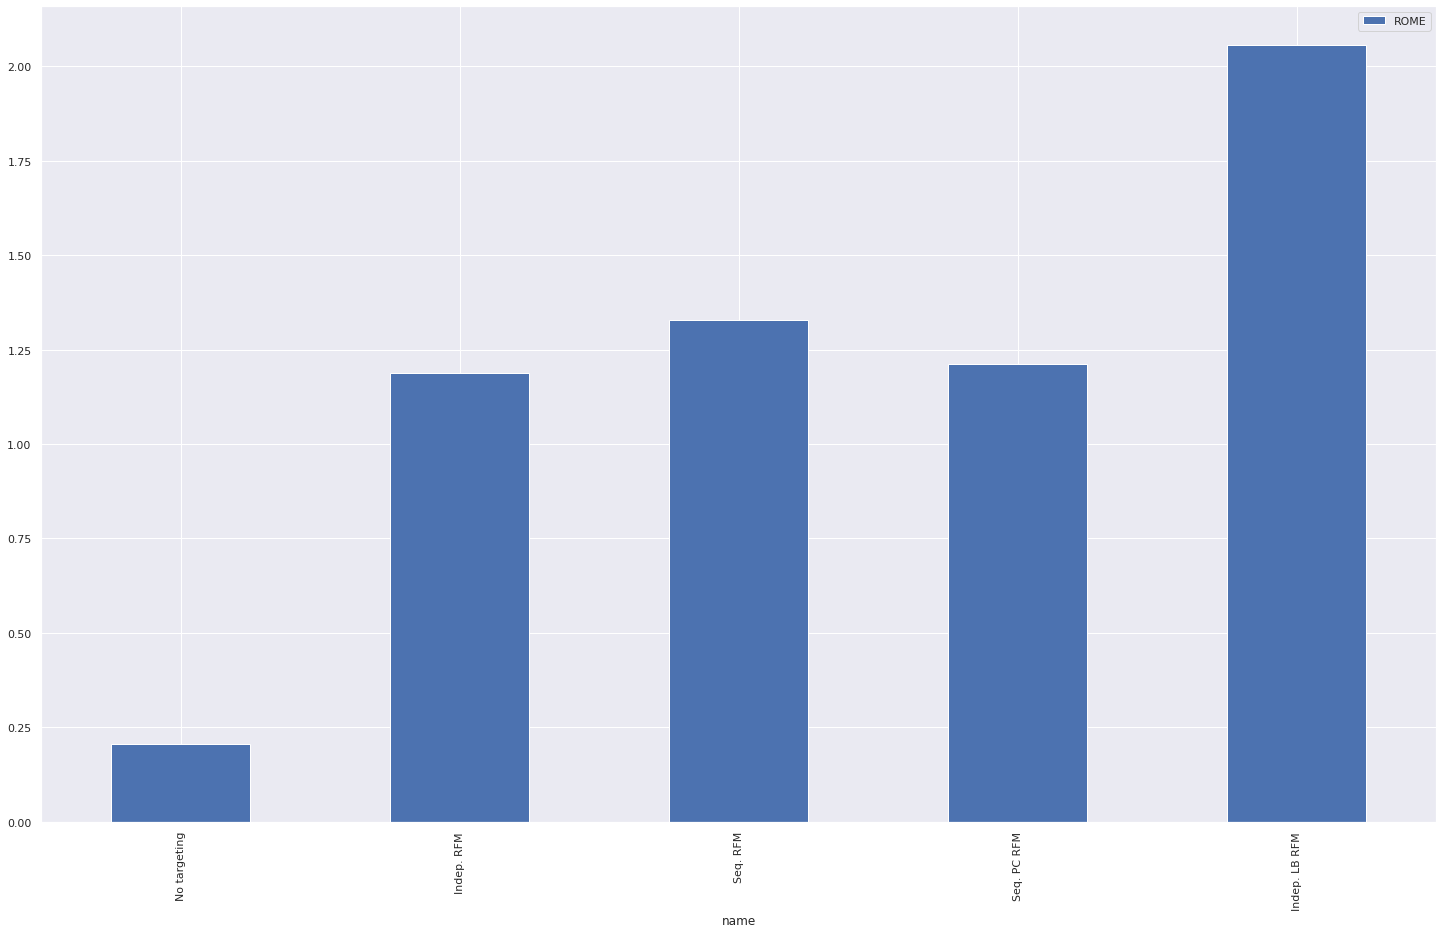

In [247]:
# insert code for the ROME plot based on the 'plot_data' DataFrame
fig = plot_data.plot.bar('name', 'ROME')

### Question 14

Make a copy of the current notebook `tuango-pre.ipynb` and name the copy `tuango-post.ipynb`. You also have access to a dataset with the results from the SMS roll-out (`tuango_post.pkl`). Tuango actually contacted all 250,902 customers. The data has a "training" variable (training = 1 for the data used in the test, training = 0 for the remaining customers). You can use this variable to help evaluate the actual performance for each of the different RFM approaches. Re-create the plot in question 13 based on this new dataset. 

Instead of using the `tuango_pre.pkl` data, use `tuango_post.pkl`. You should be able to re-use most of your code and text. Create a new function `perf_calc_actual` that calculates the actual performance for each targeting approach on the 'roll out' sample (i.e., training == 0). Also, keep your `perf_calc` and use it to check that this still calculates the same values you were seeing before based on the `tuango-pre.pkl` data. The `perf_calc_actual` function will be similar to `perf_calc` but you will need to make some changes to determine the actual outcomes. Also make sure to check that your `rfm_iq` variable is the same as `rfm_iq_pre` in the `tuango_post.pkl` dataset.

> Hint: It is important that you do NOT use any information about buyers that were in the 'roll out' sample (i.e., training == 0) when calculating the break-even response rate etc. for targeting. 

In [60]:
#import data 
tuango = pd.read_pickle("data/tuango_post.pkl")

In [61]:
#Given
cost = 2.5 # float, length 1
margin = float(pd.pivot_table(tuango, index=['buyer'],values=['ordersize'], aggfunc=[np.mean,np.std]).loc["yes", "mean"] * 0.5 ) # float, length 1
breakeven = float(cost/ margin)  # float, length 1

In [67]:
#rfm
tuango = tuango.assign(rec_iq=rsm.xtile(tuango.recency, 5))
tuango = tuango.assign(freq_iq=rsm.xtile(tuango.frequency, 5, rev=True))
tuango = tuango.assign(mon_iq=rsm.xtile(tuango.monetary, 5, rev=True))
tuango["rfm_iq"] = tuango["rec_iq"].astype(str) + tuango["freq_iq"].astype(str) + tuango["mon_iq"].astype(str)


# determine which customers to sms based on independent quintiles RFM
def mailto(x, lev = 'yes', breakeven = 0): 
    return (np.sum(x == lev) / np.sum((x == "yes") | (x == "no"))) > breakeven

smsto_iq = tuango[0:27878].groupby("rfm_iq").buyer.apply(mailto, lev = 'yes', breakeven = breakeven)
tuango["smsto_iq"] = tuango.merge(smsto_iq, how = "left", on = "rfm_iq")['buyer_y']

tuango = tuango.assign(freq_sq = tuango.groupby('rec_iq').frequency.transform(rsm.xtile, 5, rev = True))
tuango = tuango.assign(mon_sq = tuango.groupby(["rec_iq","freq_sq"]).monetary.transform(rsm.xtile, 5, rev = True))
tuango = tuango.assign(rfm_sq = tuango.rec_iq.astype(str) + tuango.freq_sq.astype(str) + tuango.mon_sq.astype(str))
smsto_sq = tuango[0:27878].groupby("rfm_sq").buyer.apply(mailto, 'yes', breakeven)
tuango["smsto_sq"] = tuango.merge(smsto_sq, how = "left", on = "rfm_sq").iloc[: , -1]
 

In [68]:
# calculate the average ordersize per sq code
def response_rate(x, lev = 'yes'):
    return np.sum(x == lev) / np.sum((x == "yes") | (x == "no"))

tuango["avg_ordersize_sq"] = tuango.merge(tuango[0:27878][tuango['buyer'] == 'yes'].groupby(["rfm_sq"])["ordersize"].apply(np.nanmean),on = "rfm_sq", how = 'left').iloc[: , -1]
tuango["breakeven_pc"] = cost / (tuango["avg_ordersize_sq"] * 0.5)
smsto_pcsq = tuango[0:27878].groupby("rfm_sq").buyer.apply(response_rate, 'yes')
tuango["smsto_pcsq"] = tuango.merge(smsto_pcsq,on = "rfm_sq", how = 'left').iloc[: , -1] >= tuango["breakeven_pc"]

# calculate the performance for lower bound with sequential quintiles
def prop_lb(x):
    return np.nanmean(x) - 1.64 * rsm.seprop(x) 

tuango["buyer_yes"] = tuango["buyer"].apply(lambda x: 1 if x == "yes" else 0).astype(np.float64)
tuango["smsto_lbiq"] = tuango.groupby(["rfm_iq"]).buyer_yes.transform(prop_lb) > breakeven

smsto_lbiq = tuango[0:27878].groupby(["rfm_iq"]).buyer_yes.apply(prop_lb)
tuango["smsto_lbiq"] = tuango.merge(smsto_lbiq, how = 'left', on = "rfm_iq")["buyer_yes_y"] > breakeven

<ipython-input-68-4e9f3aabb137>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tuango["avg_ordersize_sq"] = tuango.merge(tuango[0:27878][tuango['buyer'] == 'yes'].groupby(["rfm_sq"])["ordersize"].apply(np.nanmean),on = "rfm_sq", how = 'left').iloc[: , -1]


In [75]:
def perf_calc_act(dat=tuango, smsto=None, intro="", perf="buyer", lev="yes"):

    if smsto == None:
        nr_sms = dat[dat["training"] == 0].training.size
        sms_cost = nr_sms * cost
        
        nr_responses = dat[(dat["training"] == 0) & (dat[perf] == lev)].training.size  
        response_rate = nr_responses / dat[(dat["training"] == 0)].training.size
        revenue = dat[(dat["training"] == 0)]["ordersize"].sum()
        profit = revenue - sms_cost
        ROME = profit / sms_cost 
        
    
    else:
        nr_sms = dat[(dat["training"] == 0)  & (dat[smsto] == True)].training.size
        sms_cost = nr_sms * cost
        
        nr_responses = dat[(dat['training'] == 0) & (dat[perf] == lev) & (dat[smsto] == True)].training.size
        response_rate = nr_responses / dat[(dat['training'] == 0) & (dat[smsto] == True)].training.size
        revenue = dat[(dat["training"] == 0) & dat[smsto] == True]["ordersize"].sum()
        profit = revenue - sms_cost
        ROME = profit / sms_cost 

    
    return nr_sms, sms_cost, nr_responses, response_rate, revenue, ROME, profit

In [76]:
# all the results
#none
nr_sms_nt, sms_cost_nt, nr_responses_nt, response_rate_nt, revenue_nt, ROME_nt, profit_nt = perf_calc_act(intro="If Tuango does not apply targeting")
#iq
nr_sms_iq, sms_cost_iq, nr_responses_iq, response_rate_iq, revenue_iq, ROME_iq, profit_iq = perf_calc_act(tuango, "smsto_iq", intro="If Tuango does not apply targeting")
#sq
nr_sms_sq, sms_cost_sq, nr_responses_sq, response_rate_sq, revenue_sq, ROME_sq, profit_sq = perf_calc_act(tuango, "smsto_sq", intro="If Tuango does not apply targeting")
#sdsq
nr_sms_pcsq, sms_cost_pcsq, nr_responses_pcsq, response_rate_pcsq, revenue_pcsq, ROME_pcsq, profit_pcsq = perf_calc_act(tuango, "smsto_pcsq", intro="Based on sequential RFM with breakeven per cell")
#sdiq
nr_sms_lbiq, sms_cost_lbiq, nr_responses_lbiq, response_rate_lbiq, revenue_lbiq, ROME_lbiq, profit_lbiq = perf_calc_act(tuango, "smsto_lbiq", intro="Based on independent RFM adjusted for response rate prediction accuracy")

In [77]:
# the below DataFrame should collect all performance information you created above
plot_data = pd.DataFrame(
    {
        "name": [
            "No targeting",
            "Indep. RFM",
            "Seq. RFM",
            "Seq. PC RFM",
            "Indep. LB RFM",
        ],
        "Profit": [
            profit_nt,
            profit_iq,
            profit_sq,
            profit_pcsq,
            profit_lbiq,
        ],
        "ROME": [ROME_nt, ROME_iq, ROME_sq, ROME_pcsq, ROME_lbiq],
    }
)
plot_data

,name,Profit,ROME
0,No targeting,876240.0,1.396944
1,Indep. RFM,940412.0,3.368962
2,Seq. RFM,936196.5,3.695962
3,Seq. PC RFM,958265.5,3.465165
4,Indep. LB RFM,707998.5,5.201569


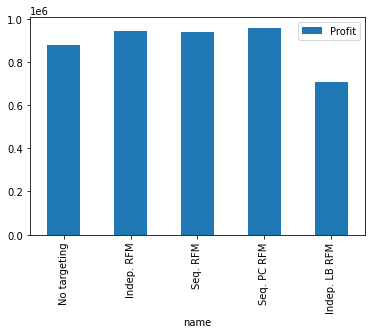

In [69]:
fig = plot_data.plot.bar('name', 'Profit')

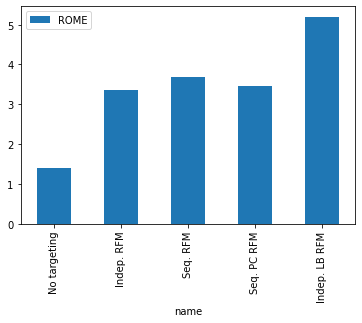

In [70]:
fig = plot_data.plot.bar('name', 'ROME')